In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [87]:
train = pd.read_csv('/datasets/sergio/Integrated_data/df_WES+RNA_response.csv', index_col=1)

In [88]:
variables = [
    "TMB_zscore",
    "APOBECenrichment.total",
    "nonstop",
    "CCND1",
    "PD1.zscore",
    "PDL1.zscore",
    "HLA-I.GSVA",
    "IFNg_Ayers.GSVA",
    "Stroma_EMT.GSVA",
    "T_cell_inflamed.GSVA",
    "TGF_beta.GSVA",
    "APM_8.GSVA",
    "t.spec.lncRNA.GSVA",
    "Macrophages M1",
    "T cells CD4 memory activated",
    "T cells CD8",
    "T cells regulatory (Tregs)",
    "ECOG_under0",
    "Liver.Metastasis",
    "Response"
  ]

In [89]:
train = train[variables]

In [90]:
columns_to_convert = ['ECOG_under0', 'Liver.Metastasis', 'Response']

train = pd.get_dummies(train, columns=columns_to_convert, drop_first=True)
train['ECOG_under0_Y'] = train['ECOG_under0_Y'] .astype(int)
train['Liver.Metastasis_Y'] = train['Liver.Metastasis_Y'] .astype(int)

In [91]:
train = train.dropna()

In [93]:
train

,TMB_zscore,APOBECenrichment.total,nonstop,CCND1,PD1.zscore,PDL1.zscore,HLA-I.GSVA,IFNg_Ayers.GSVA,Stroma_EMT.GSVA,T_cell_inflamed.GSVA,TGF_beta.GSVA,APM_8.GSVA,t.spec.lncRNA.GSVA,Macrophages M1,T cells CD4 memory activated,T cells CD8,T cells regulatory (Tregs),ECOG_under0_Y,Liver.Metastasis_Y,Response_R
Patient.ID,,,,,,,,,,,,,,,,,,,,
10003,-0.891750,0.516204,0.0,-0.259616,-0.845601,-0.311841,-0.041054,-0.540373,-0.550682,-0.737539,-0.857644,0.554611,0.328496,0.037114,0.058721,0.032267,0.000000,0,0,False
10006,-0.412313,3.980667,0.0,-0.444811,0.530913,-0.149077,0.591412,-0.225226,0.439860,0.605393,0.641361,-0.491200,-0.335365,0.060386,0.040839,0.036845,0.000000,0,1,False
10007,1.054479,3.890997,2.0,-0.477184,0.515742,-0.484826,-0.652075,0.246432,-0.485697,-0.204413,-0.750351,-0.560826,0.084616,0.170383,0.250777,0.355988,0.000000,1,1,True
10008,-0.640164,1.581648,0.0,0.208404,-0.629186,1.003947,0.499790,0.606835,0.682316,-0.673338,0.738270,0.426208,0.203270,0.155766,0.064385,0.071672,0.000000,1,0,False
10010,0.100352,4.025293,0.0,-0.390846,-0.043368,-0.123613,-0.726938,0.837293,-0.285036,0.695243,-0.727675,0.264652,0.459902,0.155473,0.171600,0.221890,0.004880,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R4,-0.293640,3.553355,0.0,3.996158,-0.681979,-0.665082,-0.582866,-0.682884,-0.649871,-0.773303,-0.686650,-0.455264,0.256505,0.037619,0.000000,0.089754,0.020868,0,0,True
R5,0.494345,2.849100,1.0,-0.137695,-0.580647,-0.375212,-0.271566,0.451341,0.089614,-0.688221,-0.519640,0.308128,-0.211567,0.205666,0.000300,0.041193,0.000000,0,0,True
R6,2.511777,4.156883,2.0,-0.235723,-0.403015,-0.011634,-0.008821,0.654128,0.093357,0.485492,-0.409463,0.345444,0.098713,0.273441,0.101671,0.137947,0.011347,0,0,True


In [97]:
labels = train['Response_R']
train = train.drop('Response_R', axis=1)

KeyError: 'Response_R'

In [111]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.3, random_state=112)

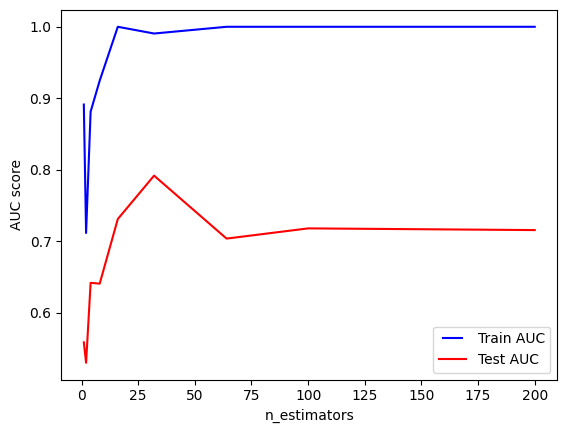

In [112]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)

   # Training AUC
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   # Test AUC
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

# Plotting
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

# Find the index of maximum test AUC
max_test_auc_index = test_results.index(max(test_results))

# Get the corresponding n_estimators value
optimal_n_estimators = n_estimators[max_test_auc_index]

# Annotate the optimal n_estimators value on the plot
plt.annotate(f'Optimal n_estimators = {optimal_n_estimators}',
             xy=(optimal_n_estimators, max(test_results)),
             xytext=(optimal_n_estimators, max(test_results) - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


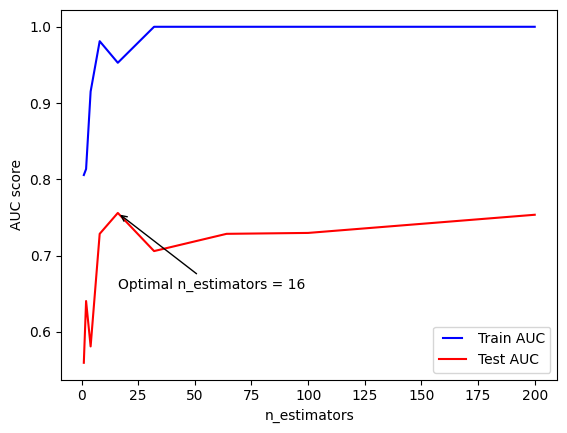

In [113]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)

   # Training AUC
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   # Test AUC
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

# Plotting
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')

# Find the index of maximum test AUC
max_test_auc_index = test_results.index(max(test_results))

# Get the corresponding n_estimators value
optimal_n_estimators = n_estimators[max_test_auc_index]

# Annotate the optimal n_estimators value on the plot
plt.annotate(f'Optimal n_estimators = {optimal_n_estimators}',
             xy=(optimal_n_estimators, max(test_results)),
             xytext=(optimal_n_estimators, max(test_results) - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np

n_estimators = [16, 32, 64, 100, 200]
num_iterations = 10  # Number of iterations for stability
average_test_results = []

for iteration in range(num_iterations):
    test_results = []

    for estimator in n_estimators:
        rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)

    average_test_results.append(test_results)

# Calculate the average AUC scores for each estimator
average_test_results = np.mean(average_test_results, axis=0)

# Find the optimal n_estimators value
optimal_n_estimators = n_estimators[np.argmax(average_test_results)]
print("Optimal n_estimators:", optimal_n_estimators)


Optimal n_estimators: 200
